# The Critics Critique Results Analysis

## 0. import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 4000

## 1. import Data

In [3]:
scored_texts = pd.read_csv('../data/scored_texts.csv')

In [15]:
scored_texts.head()

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj
0,meristation,https://as.com/meristation/2008/12/22/analisis...,Javier de Pascual,Metal Gear Solid Mobile,Konami,"Acción, Tactical",NGE,"Por alguna extraña razón, cuando el jugón trad...",8.5,"[{'label': '3 stars', 'score': 0.4069659113883...",3.17,'4 starts',4.25
1,meristation,https://as.com/meristation/2012/12/19/analisis...,Pablo González,THE DENPA MEN: They Came By Wave,None,RPG,3DS,Nintendo 3DS ha apostado desde su primer día e...,7.2,"[{'label': '4 stars', 'score': 0.4059227108955...",4.00,'4 starts',3.60
2,meristation,https://as.com/meristation/2019/09/03/analisis...,David Arroyo,Telling Lies,Annapurna Interactive,Aventura,PC PS4 XBO NSW,Hablar de Telling Lies es un poco complicado. ...,8.0,"[{'label': '3 stars', 'score': 0.4342378377914...",3.62,'4 starts',4.00
3,meristation,https://as.com/meristation/2014/10/06/analisis...,Salva Fernàndez,Titanfall: IMC Rising,None,"Acción, First Person Shooter",PC 360 XBO,Titanfall recibe el último contenido descargab...,7.0,"[{'label': '3 stars', 'score': 0.4690837860107...",3.40,'4 starts',3.50
4,meristation,https://as.com/meristation/2014/04/16/analisis...,None,Moebius: Empire Rising,None,Aventura Gráfica,PC OSX IPH IPD AND,"“Aquellos que no pueden recordar el pasado, es...",6.8,"[{'label': '4 stars', 'score': 0.4857680797576...",3.08,'3 starts',3.40


## 2. Data Exploration

In [4]:
scored_texts['platform'] = scored_texts['platform'].replace({'Xbox 360': '360',
                                             'XOne': 'Xbox One', 
                                             'iOS': 'iPhone', 
                                             '3DS': 'Nintendo 3DS', 
                                             'WiiU': 'Wii U',
                                             'Nintendo Switch': 'Nintendo Switch',
                                             '\xa0· ': '',
                                             'X360': '360',
                                             'XBO': 'Xbox One', 
                                             'IPH': 'iPhone', 
                                             'IPD': 'iPad', 
                                             'AND': 'Android', 
                                             'WiiU': 'Wii U', 
                                             'NSW': 'Switch',
                                             'PSV': 'Vita',
                                             'GB': 'Game Boy',
                                             'STD': 'Stadia',
                                             'OSX': 'Mac',
                                             'PSVITA': 'Vita',
                                             'NDS': 'DS',
                                             'Ipad': 'iPad', 
                                             'Nintendo DS': 'DS',             
                                             'Móviles': 'Android'               
                                              }, regex=True)

In [5]:
scored_texts['game'].replace({' - Análisis': '', 'Análisis de ': ''}, regex=True, inplace=True)

In [6]:
scored_texts['author'] = scored_texts['author'].replace({'(\D+)\\n': '', '(\D+) - @': ''}, regex=True)

In [7]:
#Counting games per platform: Nintendo Switch - 3819, PS4 - 5589, Xbox One - 4276, PS3 - 3772, Nintendo 3DS - 1196, Xbox 360 - 3520, PC - 8511, Android - 1071 y iPhone - 1847

#scored_texts[scored_texts['platform'].str.contains("Xbox")].value_counts()

In [10]:
scored_texts['company'] = scored_texts['company'].replace({'Bandai Namco Entertainment': 'Bandai Namco', 
                                                           'Sony Computer Entertainment': 'Sony',
                                                           'Xbox Game Studios': 'Microsoft',
                                                           'Namco Bandai': 'Bandai Namco',
                                                           'Electronic Arts': 'EA',
                                                           'EA Sports': 'EA',
                                                           'THQ Nordic': 'THQ',
                                                           'Nordic Games': 'THQ',
                                                           'Microsoft Game Studios': 'Microsoft',
                                                           'Microsoft Studios': 'Microsoft',
                                                           'Warner Bros. Interactive Entertainment': 'Warner Bros.',
                                                           'Bethesda Softworks': 'Bethesda',
                                                           'Team 17': 'Team17',
                                                           'Blizzard Entertainment': 'Blizzard',
                                                           '2K Games': 'Take-Two Interactive',
                                                           '2K Sports': 'Take-Two Interactive',
                                                           '2K': 'Take-Two Interactive',
                                                           'Sony Interactive Entertainment': 'Sony',
                                                           'Sony Europe': 'Sony',
                                                           'Square-Enix': 'Square Enix',
                                                           'Koch Media': 'Deep Silver',
                                                           'Tecmo Koei': 'KoeTec',
                                                           'Koei Tecmo': 'KoeTec',
                                                           'Koei': 'KoeTec',
                                                           'Tecmo':'KoeTec',
                                                           'Tecmo Koei Europe': 'KoeTec',
                                                           'Tecmo': 'KoeTec',
                                                           'The Pokémon Company': 'Nintendo',
                                                           'Rockstar Games': 'Rockstar',
                                                           'Nacon': 'Bigben Interactive',
                                                           'Sega': 'SEGA',
                                                           'Private Division': 'Take-Two Interactive',
                                                           'Take 2': 'Take-Two Interactive'
                                                           
                                                          }, regex=True)

In [19]:
scored_texts

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj
0,meristation,https://as.com/meristation/2008/12/22/analisis...,Javier de Pascual,Metal Gear Solid Mobile,Konami,"Acción, Tactical",NGE,"Por alguna extraña razón, cuando el jugón trad...",8.5,"[{'label': '3 stars', 'score': 0.4069659113883...",3.17,'4 starts',4.25
1,meristation,https://as.com/meristation/2012/12/19/analisis...,Pablo González,THE DENPA MEN: They Came By Wave,None,RPG,Nintendo 3DS,Nintendo 3DS ha apostado desde su primer día e...,7.2,"[{'label': '4 stars', 'score': 0.4059227108955...",4.00,'4 starts',3.60
2,meristation,https://as.com/meristation/2019/09/03/analisis...,David Arroyo,Telling Lies,Annapurna Interactive,Aventura,PC PS4 Xbox One Switch,Hablar de Telling Lies es un poco complicado. ...,8.0,"[{'label': '3 stars', 'score': 0.4342378377914...",3.62,'4 starts',4.00
3,meristation,https://as.com/meristation/2014/10/06/analisis...,Salva Fernàndez,Titanfall: IMC Rising,None,"Acción, First Person Shooter",PC 360 Xbox One,Titanfall recibe el último contenido descargab...,7.0,"[{'label': '3 stars', 'score': 0.4690837860107...",3.40,'4 starts',3.50
4,meristation,https://as.com/meristation/2014/04/16/analisis...,None,Moebius: Empire Rising,None,Aventura Gráfica,PC Mac iPhone iPad Android,"“Aquellos que no pueden recordar el pasado, es...",6.8,"[{'label': '4 stars', 'score': 0.4857680797576...",3.08,'3 starts',3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,meristation,https://as.com/meristation/2009/02/23/analisis...,Pablo González,Eledees: The Adventures of Kai and Zero,None,Puzzle,DS,Konami fue una compañía bastante inteligente c...,7.5,"[{'label': '3 stars', 'score': 0.3707822263240...",3.57,'4 starts',3.75
15547,Vandal,https://vandal.elespanol.com/analisis/switch/t...,Sergio Martín,The Stretchers,Nintendo,Puzle,Switch,"El equipo de Tarsier Studios, responsables ent...",7.7,"[{'label': '3 stars', 'score': 0.3597940206527...",3.25,'4 starts',3.85
15548,3D Juegos,https://www.3djuegos.com/juegos/analisis/3486/...,Jesús Bella,Deadly Creatures,None,None,Wii,Si estás harto de ponerte siempre del lado de ...,8.0,"[{'label': '3 stars', 'score': 0.4155605137348...",3.50,'4 starts',4.00
15549,3D Juegos,https://www.3djuegos.com/juegos/analisis/11213...,Sergio Martín,Dragon Ball Z Ultimate Tenkaichi,None,None,PS3 360,Namco Bandai y Spike vuelven a la carga con la...,7.0,"[{'label': '4 stars', 'score': 0.4572119116783...",4.00,'4 starts',3.50


In [ ]:
Acti_blizzard_list = scored_texts[scored_texts['company'].str.contains('Activision Blizzard')].index.to_list()

### Drop reviews with score < 2

In [16]:
min_score_filter = scored_texts['score'] < 2

In [17]:
scored_texts.drop(scored_texts[min_score_filter].index, inplace = True) 

In [18]:
scored_texts[scored_texts['score'] < 2]

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj


In [20]:
#scored_texts.to_csv('../data/scored_texts_final.csv', index=False)

## 3. Data Analysis per site

### 3.1 Score Deviation per site
As the difference in percentage between adjusted score and computed score.

In [22]:
scored_texts_analytics = scored_texts[['site', 'author', 'game', 'score', 'score_adj', 'score_label', 'stars_mean', 'company', 'platform', 'genre']]

In [23]:
scored_texts_analytics

,site,author,game,score,score_adj,score_label,stars_mean,company,platform,genre
0,meristation,Javier de Pascual,Metal Gear Solid Mobile,8.5,4.25,'4 starts',3.17,Konami,NGE,"Acción, Tactical"
1,meristation,Pablo González,THE DENPA MEN: They Came By Wave,7.2,3.60,'4 starts',4.00,None,Nintendo 3DS,RPG
2,meristation,David Arroyo,Telling Lies,8.0,4.00,'4 starts',3.62,Annapurna Interactive,PC PS4 Xbox One Switch,Aventura
3,meristation,Salva Fernàndez,Titanfall: IMC Rising,7.0,3.50,'4 starts',3.40,None,PC 360 Xbox One,"Acción, First Person Shooter"
4,meristation,None,Moebius: Empire Rising,6.8,3.40,'3 starts',3.08,None,PC Mac iPhone iPad Android,Aventura Gráfica
...,...,...,...,...,...,...,...,...,...,...
15546,meristation,Pablo González,Eledees: The Adventures of Kai and Zero,7.5,3.75,'4 starts',3.57,None,DS,Puzzle
15547,Vandal,Sergio Martín,The Stretchers,7.7,3.85,'4 starts',3.25,Nintendo,Switch,Puzle
15548,3D Juegos,Jesús Bella,Deadly Creatures,8.0,4.00,'4 starts',3.50,None,Wii,None
15549,3D Juegos,Sergio Martín,Dragon Ball Z Ultimate Tenkaichi,7.0,3.50,'4 starts',4.00,None,PS3 360,None


In [24]:
scored_texts_analytics['score_deviation'] = (scored_texts_analytics['stars_mean'] - scored_texts_analytics['score_adj']) / scored_texts_analytics['score_adj'] * 100

/home/sergio/miniconda3/envs/lab_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
scored_texts_analytics.groupby('site')['score_deviation'].mean()

site
3D Juegos     -5.435291
Gamereactor   -5.286295
Vandal        -4.516404
meristation   -3.674755
revogamers     0.666360
Name: score_deviation, dtype: float64

### 3.2 Plot Score Deviation

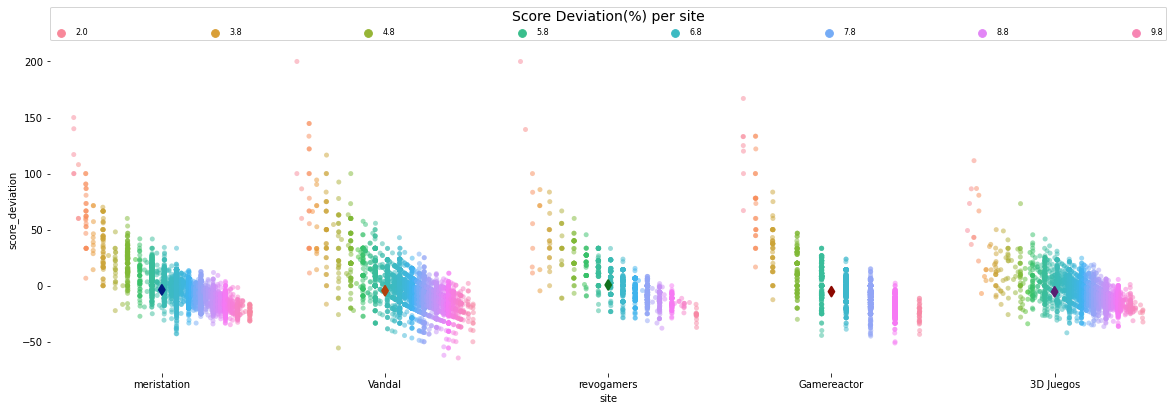

In [65]:
fig, ax = plt.subplots(figsize=(20,6))

sns.despine(bottom=True, left=True)
sns.pointplot(x="site", y="score_deviation", data=scored_texts_analytics, join=False, palette="dark", markers="d")

sns.stripplot(x="site", y="score_deviation", hue="score",
              data=scored_texts_analytics, dodge=True, alpha=.5, zorder=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::10], labels[::10], title="Score Deviation(%) per site", title_fontsize=14, frameon=True, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=20, mode="expand", borderaxespad=0., fontsize=8)
plt.show()

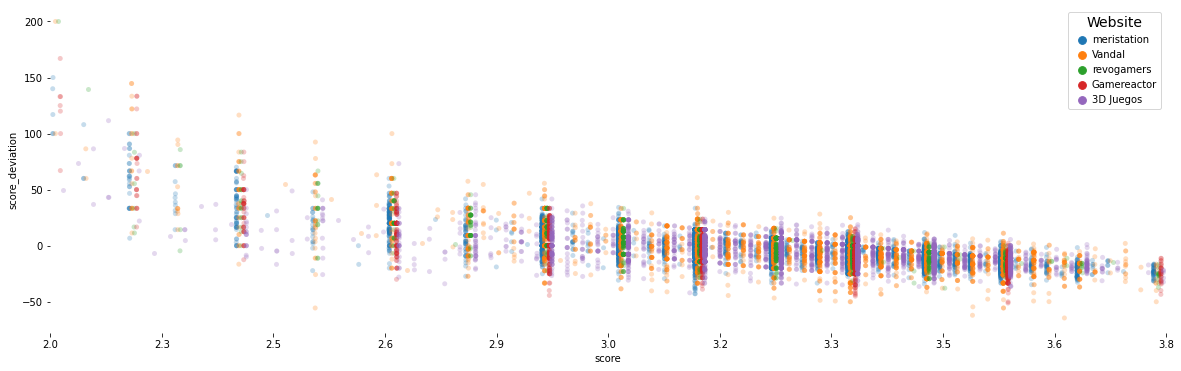

In [48]:
fig, ax = plt.subplots(figsize=(20,6))

sns.despine(bottom=True, left=True)
sns.stripplot(x="score", y="score_deviation", hue="site",
              data=scored_texts_analytics, dodge=True, alpha=.25, zorder=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], title="Website", title_fontsize=14,
          handletextpad=0, columnspacing=1,
          loc="best", ncol=1, frameon=True)
ax.xaxis.set_major_locator(plt.LinearLocator())
plt.show()

### 3.3 Site tops

In [27]:
scored_texts_analytics.groupby('site')['score'].mean()

site
3D Juegos      7.613345
Gamereactor    7.438635
Vandal         7.607977
meristation    7.456373
revogamers     7.210833
Name: score, dtype: float64

In [32]:
#Plotear

#scored_texts_analytics.groupby('site')['score'].value_counts()

In [33]:
scored_texts_analytics.groupby('site')['stars_mean'].mean()

site
3D Juegos      3.564439
Gamereactor    3.438378
Vandal         3.567523
meristation    3.522975
revogamers     3.546580
Name: stars_mean, dtype: float64

## 4. Data Analysis per company

### 4.1 Score deviation per Top companies

In [81]:
#scored_texts['company'].value_counts().head(75)

In [80]:
scored_text_comp_fil = scored_texts_analytics.drop(scored_texts_analytics[min_company_filter].index) 

/home/sergio/miniconda3/envs/lab_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [68]:
scored_texts_analytics.sort_values(['score_deviation'],ascending=False).groupby('company').head(3)

,site,author,game,score,score_adj,score_label,stars_mean,company,platform,genre,score_deviation
1917,Vandal,Fran G. Matas,Song of Horror,6.9,3.45,'3 starts',2.86,ðŸš€ Raiser Games,PC Xbox One PS4,Aventura Terror,-17.101449
10013,revogamers,Javier Aranda,City of Brass,6.5,3.25,'3 starts',3.67,Úppercut Games,Nintendo Switch,Acción,12.923077
12017,Vandal,Ramón Nafria,Arrest of a stone Buddha,7.0,3.50,'4 starts',3.20,yeo,PC Switch,Aventura de acción,-8.571429
6985,Vandal,Alberto González,Monument Valley 2,9.5,4.75,'5 starts',3.83,ustwo Games,iPhone Android,Puzle,-19.368421
5326,Vandal,Alberto González,Monument Valley,9.5,4.75,'5 starts',3.00,ustwo,iPhone Android,Puzle,-36.842105
...,...,...,...,...,...,...,...,...,...,...,...
11490,meristation,Cristian Ciuraneta,World of Goo,9.0,4.50,'4 starts',4.67,2D Boy,Android iPad iPhone,Puzzle,3.777778
14267,meristation,None,Men of War: Assault Squad,8.0,4.00,'4 starts',4.11,1C Company,PC,"Strategy, Real-Time",2.750000
7769,meristation,None,Theatre of War 2: Africa 1943,7.0,3.50,'4 starts',3.92,1C Company,PC,"Strategy, Real-Time",12.000000
15084,Vandal,Ramón Varela,Beat Cop,6.8,3.40,'3 starts',2.60,11 bit studios,PC Android Switch Xbox One PS4,Aventura narrativa,-23.529412


In [71]:
scored_texts_analytics.groupby('company')['score_deviation'].mean().sort_values().head(10)

company
Nyu Media                 -62.045455
WildSnake Software        -49.367089
Jagex                     -45.000000
Thekla                    -44.456265
Other Ocean Interactive   -43.170732
Erik Svedäng              -41.176471
Robot Invader             -40.666667
Monster and Monster       -40.000000
Daniel Mullins Games      -37.500000
Green Lava Studios        -37.500000
Name: score_deviation, dtype: float64

In [73]:
scored_texts_analytics.groupby('company')['score_deviation'].mean().sort_values(ascending=False).head(10)

company
Funbox Media          200.000000
Creashock Studios     200.000000
Punchers Impact       144.666667
The Fun Pimps         144.666667
stillalive studios    122.000000
GameMill              122.000000
IDC/Games             108.000000
Freedom Factory       100.000000
Microprose            100.000000
VectorCell            100.000000
Name: score_deviation, dtype: float64

## 5. Data Analysis per genre

In [100]:
#Totally unuseful because there is a mix
#scored_texts_analytics.groupby('genre')['score_deviation'].min().sort_values(ascending=False).head(50)

In [103]:
aventura = scored_texts_analytics[scored_texts_analytics['genre'].str.contains('Aventura')]

In [106]:
aventura.groupby('s')['score_deviation'].min().sort_values(ascending=True).head(50)

author
Ramón Varela                -64.468085
Jorge Cano                  -49.347826
Odd Karsten Svartaas        -44.333333
Ramón Nafria                -41.176471
Mario Fernández             -40.666667
Katrine Baumgardt           -38.888889
Jonas Elfving               -37.500000
Pablo Grandío               -37.500000
Dedede                      -35.714286
Carlos Leiva                -35.277778
Manu Delgado                -35.000000
Fran García                 -34.117647
Ricardo C. Esteves          -33.428571
Olga Cid                    -33.333333
Bengt Lemne                 -33.333333
Sara Borondo                -33.333333
Alberto Venegas             -33.333333
Juan Rubio                  -33.333333
Daniel Escandell            -33.250000
acastillo117                -31.400000
Wences A. Machado           -31.250000
Cesar Otero                 -30.769231
Salva Fernàndez             -30.736842
Sergio5Glez                 -30.400000
David Caballero             -29.555556
LauraLunaLu       

## 6. Data Analysis per author

In [97]:
scored_texts_analytics.groupby('author')['score_deviation'].min().sort_values(ascending=True).head(50)

author
Ramón Varela                           -64.468085
Alberto González                       -62.045455
Daniel Escandell                       -55.555556
Lorenzo Mosna                          -51.111111
Jorge Cano                             -50.000000
Lorenzo Mosna (Gamereactor Italia)     -50.000000
Carlos Leiva                           -49.892473
Fredrik Walløe                         -45.000000
Odd Karsten Svartaas                   -44.333333
Fabrizia Malgieri                      -43.750000
Thomas Blichfeldt                      -43.400000
Fernando B.P.                          -42.857143
Ramón Méndez                           -42.857143
Petter Hegevall                        -42.750000
David Moschini                         -42.222222
Álvaro Castellano                      -42.028986
Pablo Grandío                          -41.750000
Ramón Nafria                           -41.176471
Juan Rubio                             -41.012658
Mario Fernández                        -40.

In [ ]:
print(f"Nota media de Sergio {scored_texts[scored_texts['author'].str.contains('Sergio Figueroa')]['score'].mean()}, David: {scored_texts[scored_texts['author'].str.contains('David Caballero')]['score'].mean()} y Juan : {scored_texts[scored_texts['author'].str.contains('Juan A. Fonseca')]['score'].mean()}")